# Project Block 2: Advanced Statistics
## Diego Díaz Ayala 
## A01770236

### Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Part 1 - Advanced topics in multiple regression

In this part, you have to improve the multiple regression model you ended up in block 1 of the course (here is a description of the previous project).

The topics we will learn and apply in this part are the following:

- Descriptive statistics for ratios

- Multiple regression with categorical variables

- Multiple regression with interaction effects

- Treatment of extreme values for independent variables - winsorization

- Estimation of beta coefficients and standard errors in multiple regression using matrix algebra

- The Hat Matrix

- Identification of leverage observations

- Identification of possible outliers

- Identification and treatment of possible influential observations

You have to do the following:

Make sure that all the variable calculations and descriptive statistics is correct and complete (attend the feedback you received for this part). Do any correction or complete what you missed in the]

### Read the dataset.

In [2]:
data = pd.read_csv("dataus2023.csv")
firms = pd.read_csv("firmsus2023.csv")

### Use 'qdate' column as index.

In [3]:
data['qdate']= pd.PeriodIndex(data.q, freq='Q')
data.set_index(["firm","qdate"], inplace=True)

In [4]:
data.head(10)

q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q1  2000q1          NaN         NaN        NaN        NaN   
     2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
     2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
     2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
     2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
     2001Q2  2001q2          6.0   4930000.0  2683000.0  2025000.0   
     2001Q3  2001q3          9.0   6736000.0  3829000.0  3027000.0   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.0   
     2002Q1  2002q1          3.0   1426000.0   878000.0   990000.0   
     2002Q2  2002q2          6.0   2883000.0  1732000.0  1942000.0   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2      73000.0                 0.0     0.0   161000.0    7321000.0   
     2000Q3     101000.0                 0.0     0.0   244000.0    7827000.0   
     2000Q4     111000.0                 0.0     0.0   407000.0    8425000.0   
     2001Q1      19000.0            -25000.0     0.0   119000.0    9208000.0   
     2001Q2     277000.0            -14000.0     0.0   235000.0    9080000.0   
     2001Q3     312000.0            -19000.0     0.0   142000.0    8622000.0   
     2001Q4     301000.0            580000.0     0.0   -71000.0    7986000.0   
     2002Q1      19000.0              2000.0     0.0  -106000.0    8558000.0   
     2002Q2      41000.0             -4000.0     0.0  -186000.0    8238000.0   

             ...  inventory  totalliabilities  currentliabilities   longdebt  \
firm qdate   ...                                                               
A    2000Q1  ...        NaN               NaN                 NaN        NaN   
     2000Q2  ...  1622000.0         2679000.0           2186000.0        0.0   
     2000Q3  ...  1762000.0         2925000.0           2510000.0        0.0   
     2000Q4  ...  1853000.0         3160000.0           2758000.0        0.0   
     2001Q1  ...  2129000.0         3667000.0           3070000.0        0.0   
     2001Q2  ...  1791000.0         3464000.0           3098000.0        0.0   
     2001Q3  ...  1704000.0         3135000.0           2804000.0        0.0   
     2001Q4  ...  1491000.0         2327000.0           2002000.0        0.0   
     2002Q1  ...  1382000.0         3163000.0           1660000.0  1150000.0   
     2002Q2  ...  1307000.0         3110000.0           1609000.0  1150000.0   

              adjprice  originalprice  sharesoutstanding  year  fixedassets  \
firm qdate                                                                    
A    2000Q1  63.332411     104.000000         452000.000  2000          NaN   
     2000Q2  44.911205      73.750000         452271.967  2000    1453000.0   
     2000Q3  29.801249      48.937500         453014.579  2000    1581000.0   
     2000Q4  33.340861      54.750000         456366.381  2000    1741000.0   
     2001Q1  18.713509      30.730000         456769.737  2001    1821000.0   
     2001Q2  19.791378      32.500000         457072.749  2001    1848000.0   
     2001Q3  11.905275      19.549999         460637.309  2001    1807000.0   
     2001Q4  17.361606      28.510000         463695.160  2001    1848000.0   
     2002Q1  21.289433      34.959999         463859.978  2002    1787000.0   
     2002Q2  14.402034      23.650000         464247.548  2002    1728000.0   

              yearf  
firm qdate           
A    2000Q1     NaN  
     2000Q2  2000.0  
     2000Q3  2000.0  
     2000Q4  2000.0  
     2001Q1  2001.0  
     2001Q2  2001.0  
     2001Q3  2001.0  
     2001Q4  2001.0  
     2002Q1  2002.0  
     2002Q2  2002.0  

[10 rows x 21 columns]

### Merge the datasets.

In [5]:
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]
firms1.columns = ['firm', 'Empresa', 'status', 'industria']
data = pd.merge(data, firms1, on="firm", how='left')

In [6]:
data.head(10)

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.332411,104.000000,452000.000,2000,NaN,NaN,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,0.0,44.911205,73.750000,452271.967,2000,1453000.0,2000.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,0.0,29.801249,48.937500,453014.579,2000,1581000.0,2000.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,0.0,33.340861,54.750000,456366.381,2000,1741000.0,2000.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,0.0,18.713509,30.730000,456769.737,2001,1821000.0,2001.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
5,A,2001q2,6.0,4930000.0,2683000.0,2025000.0,277000.0,-14000.0,0.0,235000.0,...,0.0,19.791378,32.500000,457072.749,2001,1848000.0,2001.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
6,A,2001q3,9.0,6736000.0,3829000.0,3027000.0,312000.0,-19000.0,0.0,142000.0,...,0.0,11.905275,19.549999,460637.309,2001,1807000.0,2001.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
7,A,2001q4,12.0,8396000.0,5166000.0,4008000.0,301000.0,580000.0,0.0,-71000.0,...,0.0,17.361606,28.510000,463695.160,2001,1848000.0,2001.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
8,A,2002q1,3.0,1426000.0,878000.0,990000.0,19000.0,2000.0,0.0,-106000.0,...,1150000.0,21.289433,34.959999,463859.978,2002,1787000.0,2002.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
9,A,2002q2,6.0,2883000.0,1732000.0,1942000.0,41000.0,-4000.0,0.0,-186000.0,...,1150000.0,14.402034,23.650000,464247.548,2002,1728000.0,2002.0,"Agilent Technologies, Inc",activo,Industrias manufactureras


### We calculate the log quarterly returns (rq) and then log of returns by year (ry)

In [7]:
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

### We estimate 1 quarter log in the future and 4 quarter log in the future, and we do the same for 1 year log future and 4 year log future.

In [8]:
data['f1rq'] = data.groupby(['firm'])['rq'].shift(-1)
data['f4rq'] = data.groupby(['firm'])['rq'].shift(-4)

data['f1ry'] = data.groupby(['firm'])['ry'].shift(-1)
data['f4ry'] = data.groupby(['firm'])['ry'].shift(-4)

### Ratios.

We calculate each ratio

- Earnings before interest and taxes (ebit)
- Operating profit margin (opm)
- Netincome
- Profit Margin
- Asset turn over ratio
- Acid ratio
- Finantian Leverage Ratio
- Market Value
- Book Value

In [9]:
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']
data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])
data['ato'] = np.where(data['totalassets'] == 0, np.NaN, data['revenue'] / data['totalassets'])
data['acidratio'] = np.where(data['currentliabilities']==0,np.NaN,data['currentassets'] / data['currentliabilities'])
data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']
data['bookvalue'] = data['totalassets'] - data['totalliabilities']

### Select the data for our industry, the fiscal month 12 and the year 2022.

In [10]:
datasery = data.loc[(data['industria'] == "Industrias manufactureras") & (data['fiscalmonth']==12) & (data['status']=='activo')]


# 1.1 Descriptive Statistics
### Weighted average for ratios.

For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios. To calculate the weighted average of a ratio, you have to divide the sum of the numerator variable by the sum of the denominator variable. For example, to calculate the weighted average of profit margin you first sum all the net income of all firms and then divide it by the sum of revenue of all firms.

Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.

In [11]:
wa_pm = np.where(datasery['revenue'].sum() == 0, np.NaN, datasery['netincome'].sum() / datasery['revenue'].sum())
wa_ato = np.where(datasery['totalassets'].sum() == 0, np.NaN, datasery['revenue'].sum() / datasery['totalassets'].sum())
wa_acidratio = np.where(datasery['currentliabilities'].sum()==0,np.NaN,datasery['currentassets'].sum() / datasery['currentliabilities'].sum())
wa_finlev = np.where(datasery['totalassets'].sum() == 0, np.NaN, datasery['longdebt'].sum() / datasery['totalassets'].sum())

We compare each one with the mean and the median of its variable.

In [12]:
list = [[wa_pm, datasery['pm'].mean(), datasery['pm'].median()], [wa_ato, datasery['ato'].mean(), datasery['ato'].median()], 
        [wa_acidratio, datasery['acidratio'].mean(), datasery['acidratio'].median()], [wa_finlev, datasery['finlev'].mean(), datasery['finlev'].median()]]

columns = ['Weighted average', 'Mean', 'Median']
index = ['pm', 'ato', 'acidratio', 'finlev']

data_compare = pd.DataFrame(list, columns = columns, index = index)

data_compare.head()

,Weighted average,Mean,Median
pm,0.08130447831713919,-16.920671,0.039613
ato,0.7307949843016704,0.857453,0.724232
acidratio,1.57458144406445,4.290081,2.511410
finlev,0.23472038358068537,0.232996,0.143466


- Profit margin.

In the weighted average we can see that value is not really high so we couldn´t say that is really significative, in the case of the mean we can see that is negative so this tells us that they may be presence of atypical values in the dataset and this idea is reaffirmed by the fact that the median is much larger than the mean, which suggests that the values ​​are very skewed.

- Asset Turn Over.

In this case we can see that the weighted average is really higher than the weighted average of the profit margin wich suggest that this observation has more significance, and in comparision with the mean and the median they are not really far away wich means that the data is not really skewed.

# 1.2 Multiple Regression - advanced topics

## 1.2.1 Calculation of Variables

For the complete historical dataset of annual fiscal years (fiscalmonth=12 for all quarter-years), you have to calculate the following new independent variables:

- Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.

- Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.

- Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

- Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

- Calculate book-to-market ratio: bmr = bookvalue / marketvalue

In this model, the variable you have to use as dependent variable will be annual stock returns (instead of quarterly returns) one quarter in the future (f1.ry).

### Categorical values

-  We will set the categorical variable for each firm choosing it for the market value

In [13]:
df = datasery.copy()

# We divide de market value in its quantiles
quantiles = df['mvalue'].quantile([1/3, 2/3])

# Define the labels for the categorical value
categories = ['S', 'M', 'H']

# We add the new variable into the daataset
df['market_category'] = pd.cut(df['mvalue'], bins=[-float('inf'), quantiles.iloc[0], quantiles.iloc[1], float('inf')], labels=categories)

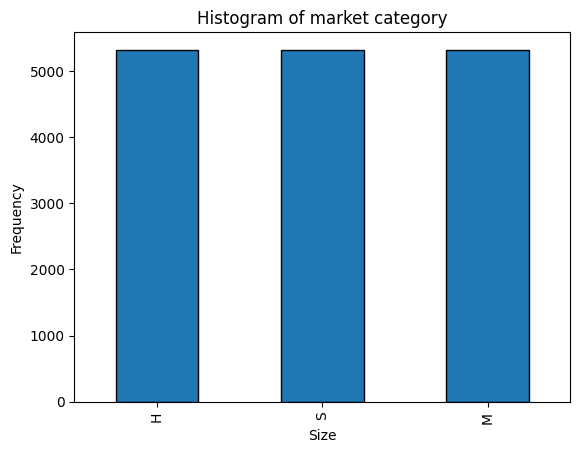

In [14]:
 #Visualize the distribution of the categorical values

frecuencia_categorias = df['market_category'].value_counts()

frecuencia_categorias.plot.bar(edgecolor='black')

plt.title('Histogram of market category')
plt.xlabel('Size')
plt.ylabel('Frequency')

plt.show()

### Dummy encoding method.

In [15]:
one_hot = pd.get_dummies(df['market_category'])
df = df.drop('market_category', axis = 1)
df = df.join(one_hot)
df

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue,S,M,H
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.000,111000.000,0.000000e+00,0.000,407000.0,...,757000.000,0.070268,1.278694,2.050399,0.000000,2.498606e+07,5265000.000,False,False,True
7,A,2001q4,12.0,8396000.0,5166000.0,4008000.000,301000.000,5.800000e+05,0.000,-71000.0,...,174000.000,0.020724,1.051340,2.397103,0.000000,1.321995e+07,5659000.000,False,False,True
11,A,2002q4,12.0,6010000.0,3694000.0,3923000.000,60000.000,-1.000000e+04,0.000,-525000.0,...,-1032000.000,-0.171714,0.732659,2.237506,0.140193,8.387759e+06,4627000.000,False,False,True
15,A,2003q4,12.0,6056000.0,3762000.0,3019000.000,35000.000,-2.680000e+05,0.000,1100000.0,...,-2058000.000,-0.339828,0.961728,2.040399,0.182627,1.392260e+07,2824000.000,False,False,True
19,A,2004q4,12.0,7181000.0,4058000.0,2737000.000,54000.000,0.000000e+00,0.000,91000.0,...,349000.000,0.048600,1.017715,2.446285,0.162982,1.173287e+07,3569000.000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532973,ZYNE,2018q4,12.0,86.0,0.0,40483.830,-474.668,0.000000e+00,-961.323,0.0,...,-39911.175,-464.083430,0.001277,6.884329,0.000000,5.235181e+04,57601.661,True,False,False
532977,ZYNE,2019q4,12.0,0.0,0.0,34319.810,-145.911,0.000000e+00,-1522.138,0.0,...,-32943.583,NaN,0.000000,7.219675,0.001250,1.401160e+05,75596.743,True,False,False
532981,ZYNE,2020q4,12.0,0.0,0.0,52062.542,481.719,0.000000e+00,-243.992,0.0,...,-51336.831,NaN,0.000000,5.273116,0.000000,9.714928e+04,60143.528,True,False,False
532985,ZYNE,2021q4,12.0,0.0,0.0,36770.390,-559.681,0.000000e+00,-21.047,0.0,...,-37309.024,NaN,0.000000,8.099352,0.004357,1.187065e+05,70913.334,True,False,False


### Calculate new variables

- Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

- Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

- Calculate book-to-market ratio: bmr = bookvalue / marketvalue

In [16]:
df['oepsp'] = np.where(df['sharesoutstanding'] == 0, np.NaN, (df['ebit'] / df['sharesoutstanding']) / df['originalprice'])
df['epsp'] = np.where(df['sharesoutstanding'] == 0, np.NaN, (df['netincome'] / df['sharesoutstanding']) / df['originalprice'])
df['bmr'] = df['bookvalue'] / df['mvalue']

In [17]:
np.seterr(divide = 'ignore') 

# Calculate logarit values for financial variables.

dataser = df.copy()

dataser['logta'] = np.where(dataser['totalassets']==0,np.NaN,np.log(dataser['totalassets']))
dataser['logre'] = np.where(dataser['revenue']==0,np.NaN,np.log(dataser['revenue']))
dataser['lognet'] = np.where(dataser['netincome']==0,np.NaN,np.log(dataser['netincome']))
dataser['logato'] = np.where(dataser['ato']==0,np.NaN,np.log(dataser['ato']))

dataser.head(10)

C:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,S,M,H,oepsp,epsp,bmr,logta,logre,lognet,logato
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,False,False,True,0.042144,0.030297,0.210718,15.946714,16.192554,13.537119,0.245840
7,A,2001q4,12.0,8396000.0,5166000.0,4008000.0,301000.0,580000.0,0.0,-71000.0,...,False,False,True,-0.058850,0.013162,0.428065,15.893201,15.943266,12.066811,0.050065
11,A,2002q4,12.0,6010000.0,3694000.0,3923000.0,60000.0,-10000.0,0.0,-525000.0,...,False,False,True,-0.191589,-0.123036,0.551637,15.920010,15.608935,NaN,-0.311075
15,A,2003q4,12.0,6056000.0,3762000.0,3019000.0,35000.0,-268000.0,0.0,1100000.0,...,False,False,True,-0.052074,-0.147817,0.202836,15.655584,15.616560,NaN,-0.039024
19,A,2004q4,12.0,7181000.0,4058000.0,2737000.0,54000.0,0.0,0.0,91000.0,...,False,False,True,0.032899,0.029745,0.304188,15.769389,15.786949,12.762827,0.017560
23,A,2005q4,12.0,5139000.0,2617000.0,2341000.0,73000.0,228000.0,0.0,155000.0,...,False,False,True,0.011002,0.019877,0.248067,15.725201,15.452369,12.697715,-0.272832
27,A,2006q4,12.0,4973000.0,2315000.0,2194000.0,163000.0,2771000.0,0.0,91000.0,...,False,False,True,0.032704,0.233087,0.257122,15.812793,15.419534,15.011552,-0.393259
31,A,2007q4,12.0,5420000.0,2451000.0,2385000.0,5000.0,0.0,-81000.0,32000.0,...,False,False,True,0.042791,0.046748,0.236962,15.837588,15.505606,13.366094,-0.331981
35,A,2008q4,12.0,5774000.0,2578000.0,2401000.0,30000.0,0.0,10000.0,122000.0,...,False,False,True,0.144507,0.125967,0.465149,15.821978,15.568876,13.448785,-0.253102
39,A,2009q4,12.0,4481000.0,2189000.0,2245000.0,19000.0,0.0,59000.0,38000.0,...,False,False,True,0.004337,-0.002860,0.231219,15.845237,15.315357,NaN,-0.529880



## 1.2.2 Winsorization of variables

Winzorization is a common technique to treat very extreme values of variables. Although winsorization has the risk of losing important information for regression analysis, it is also useful to avoid non reliable estimates of regression coefficients and standard error.

Winsorization is usually performed to ratios and percentages. For variables that measure any other feature of the subjects, the normal procedure for avoiding very extreme values is the logarithmic transformation.

You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.


### Not winzorized.

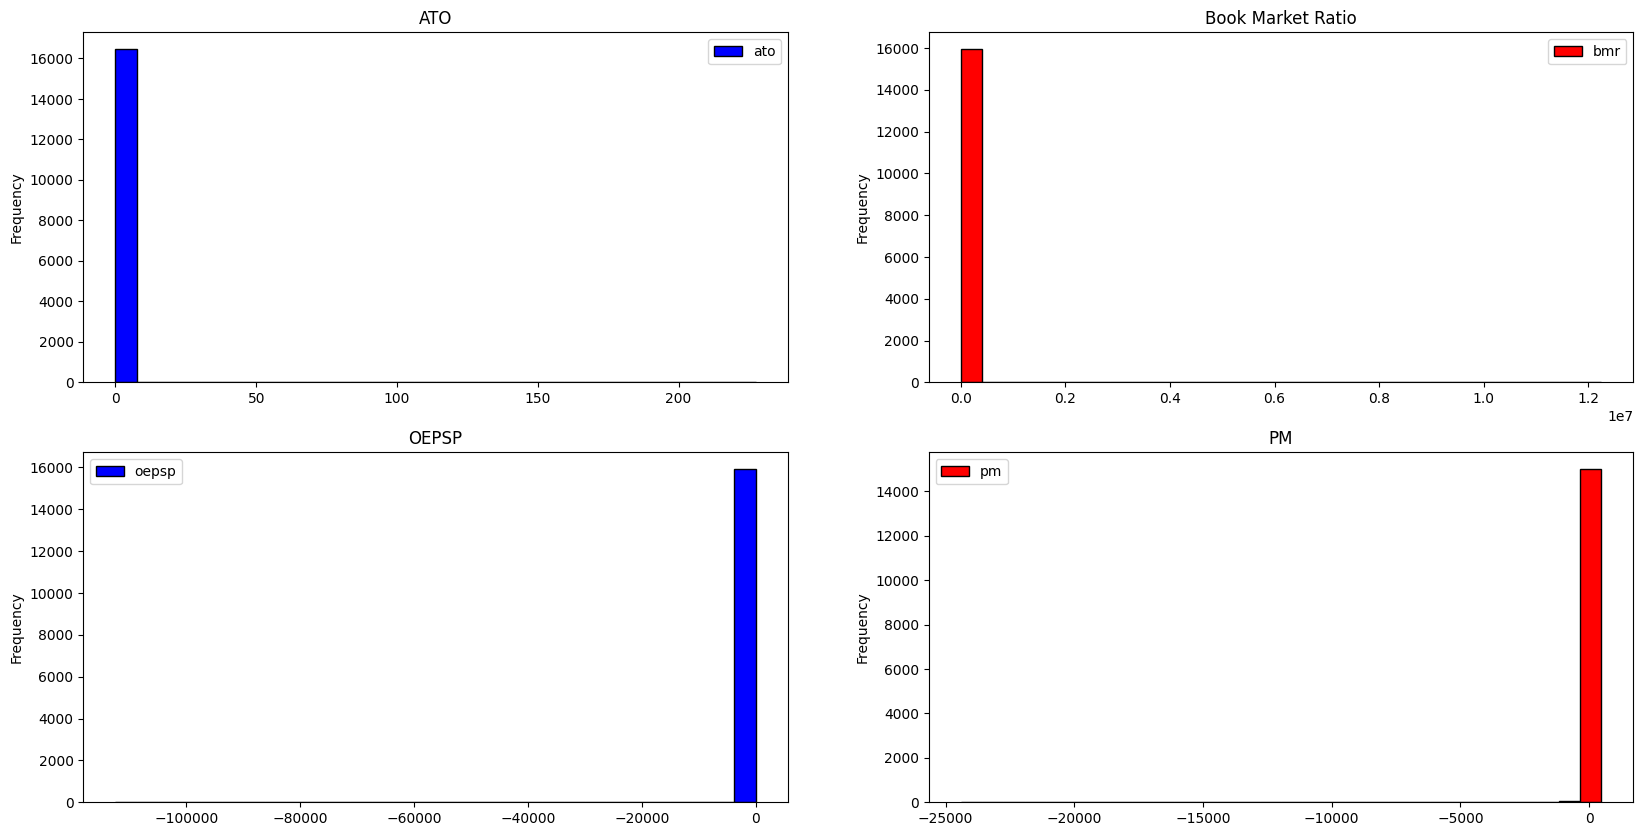

In [18]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
ato = dataser[['ato']]
ato.plot.hist(bins = 30, alpha = 1, title = "ATO", ax=plt.gca(), color = 'blue', edgecolor='black')

plt.subplot(2,2,2)
bmr = dataser[['bmr']]
bmr.plot.hist(bins = 30, alpha = 1, title = "Book Market Ratio", ax = plt.gca(), color='red', edgecolor='black')

plt.subplot(2,2,3)
oepsp = dataser[['oepsp']]
oepsp.plot.hist(bins = 30, alpha = 1, title = "OEPSP", ax = plt.gca(), color = 'blue', edgecolor='black')

plt.subplot(2,2,4)
pm = dataser[['pm']]
pm.plot.hist(bins = 30, alpha = 1, title = "PM", ax=plt.gca(), color = 'red', edgecolor='black')



plt.show()

- ATO

The histogram of the ATO appears to have some extreme values, we can see that it has a tail to the right of the histogram, and has more frequency of the values in the left, for its looks we can say that this histogram has positive skewness, the mode is typically to the left, and the mean should be greater than the median.

- BMR

The histogram of the BMR doesnt apper to have extreme values, we can see that it has a greater tail to the right,  but in general it has a more normal distribution than the ATO histogram, for this variable we can use a smaller window for the winzoritation.

- OEPSP

The histogram of the OEPSP appears to have extreme values, we can see that it has a tail to the left of the histogram, and has more frequency of the values in the right, for its looks we can say that this histogram has negative skewness, the mode is typically to the right, and the mean should be smaller than the median, we should use a greater window for the winzoritation of this variable.

- PM

The histogram of the PM appears to have extreme values, we can see that it also has a tail to the left of the histogram, and has more frequency of the values in the right, and the mean should be smaller than the median, we should use a greater window for the winzoritation of this variable.

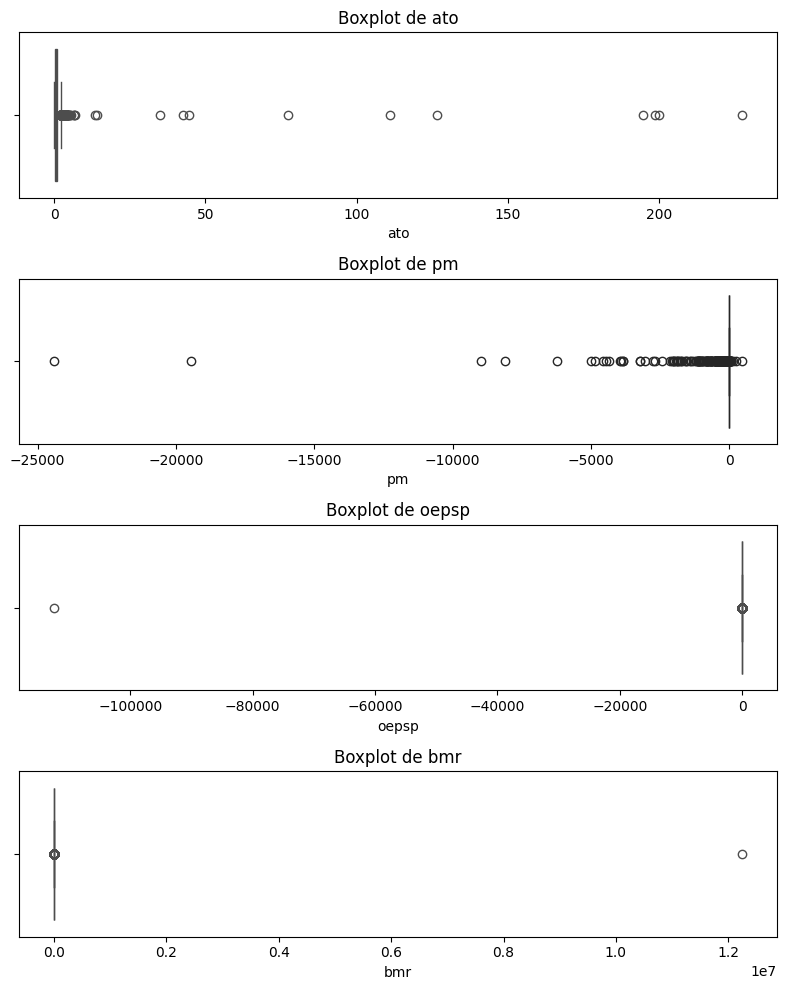

In [19]:
columnas_a_graficar = ['ato', 'pm', 'oepsp', 'bmr']
colores = ['blue', 'green', 'orange', 'red']  # Puedes ajustar los colores según tu preferencia

# Crea subgráficos para cada columna
fig, axes = plt.subplots(nrows=len(columnas_a_graficar), ncols=1, figsize=(8, 10))

# Itera sobre las columnas y crea un boxplot para cada una utilizando Seaborn con un color diferente
for i, (columna, color) in enumerate(zip(columnas_a_graficar, colores)):
    sns.boxplot(x=dataser[columna], ax=axes[i], color=color)
    axes[i].set_title(f'Boxplot de {columna}')

plt.tight_layout()
# Muestra los boxplots
plt.show()

In this boxplots we can see the presence of a lot of outliers in each of variables, so we need to winzorize all of them.

### Winzorized

Now we will winsorize this variables, keeping the 98% of the values

In [20]:
# ATO

lower_limit = dataser['ato'].quantile(0.00)
upper_limit = dataser['ato'].quantile(0.98)

dataser['ato'] = df['ato'].clip(lower=lower_limit, upper=upper_limit)

# oepsp
lower_limit = dataser['oepsp'].quantile(0.02)
upper_limit = dataser['oepsp'].quantile(1)

dataser['oepsp'] = df['oepsp'].clip(lower=lower_limit, upper=upper_limit)

# pm
lower_limit = dataser['pm'].quantile(0.02)
upper_limit = dataser['pm'].quantile(1)

dataser['pm'] = df['pm'].clip(lower=lower_limit, upper=upper_limit)

# bmr
lower_limit = dataser['bmr'].quantile(0.01)
upper_limit = dataser['bmr'].quantile(0.99)

dataser['bmr'] = df['bmr'].clip(lower=lower_limit, upper=upper_limit)

# epsp
lower_limit = dataser['epsp'].quantile(0.02)
upper_limit = dataser['epsp'].quantile(1)

dataser['epsp'] = df['epsp'].clip(lower=lower_limit, upper=upper_limit)

Now we will plot the histograms and the box plots again to see if there are still some outliers.

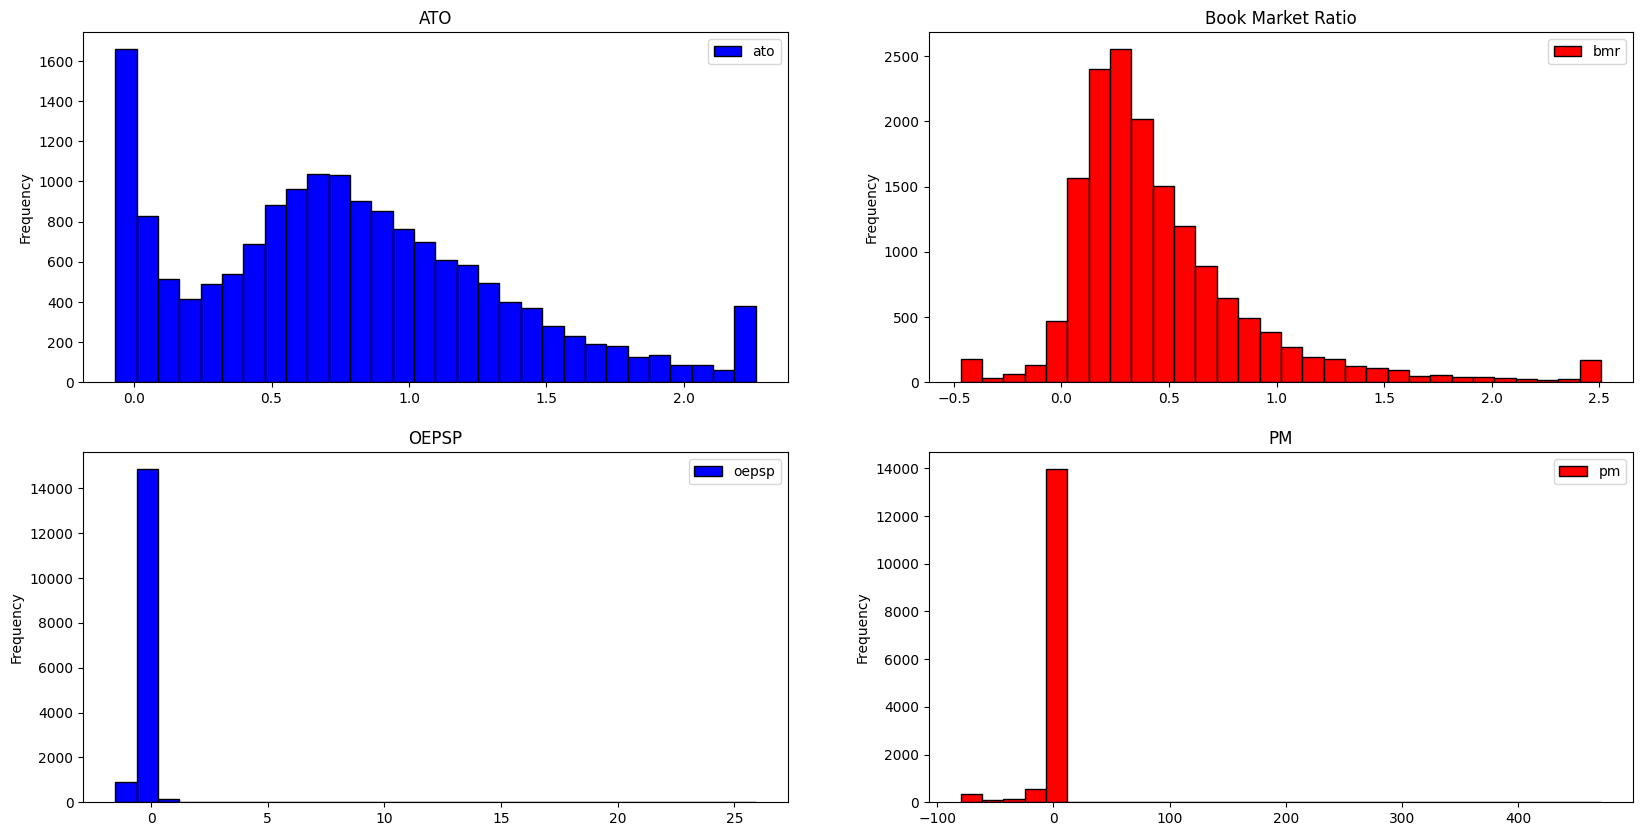

In [21]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
ato = dataser[['ato']]
ato.plot.hist(bins = 30, alpha = 1, title = "ATO", ax=plt.gca(), color = 'blue', edgecolor='black')

plt.subplot(2,2,2)
bmr = dataser[['bmr']]
bmr.plot.hist(bins = 30, alpha = 1, title = "Book Market Ratio", ax = plt.gca(), color='red', edgecolor='black')

plt.subplot(2,2,3)
oepsp = dataser[['oepsp']]
oepsp.plot.hist(bins = 30, alpha = 1, title = "OEPSP", ax = plt.gca(), color = 'blue', edgecolor='black')

plt.subplot(2,2,4)
pm = dataser[['pm']]
pm.plot.hist(bins = 30, alpha = 1, title = "PM", ax=plt.gca(), color = 'red', edgecolor='black')



plt.show()

Now we can see a more normal distribution in some of the variables, even tought some of the variables keep having skewed distributions, we can see that they dont have the extreme values that they used to before the winzorization.

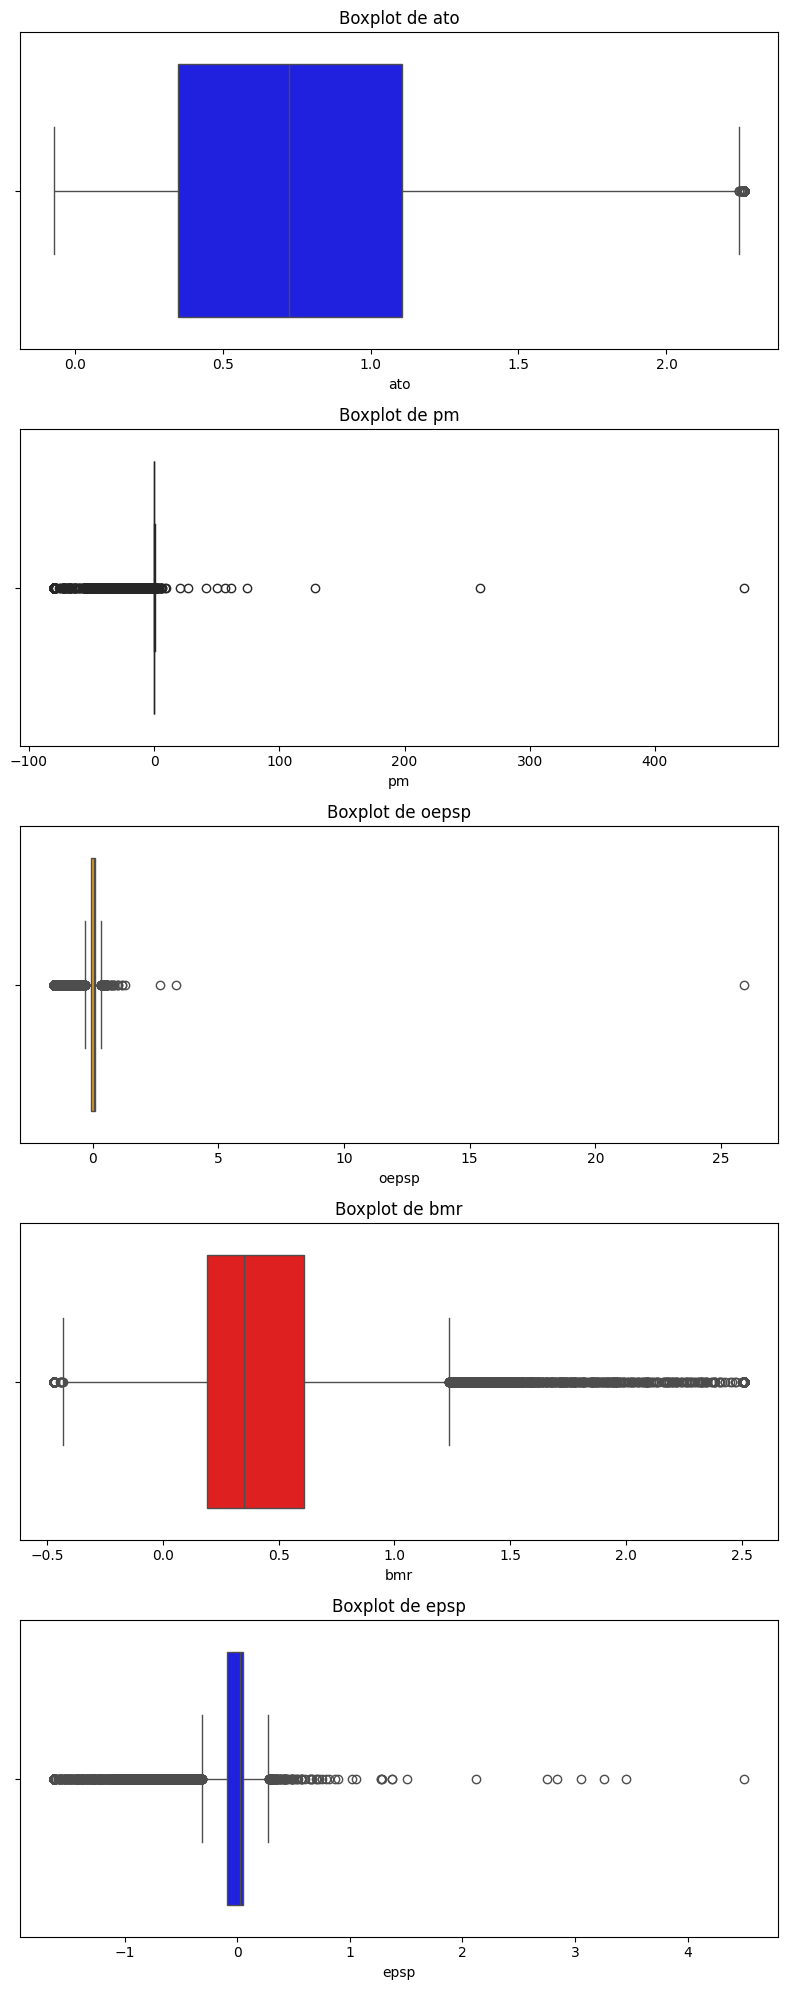

In [22]:
columnas_a_graficar = ['ato', 'pm', 'oepsp', 'bmr', 'epsp']
colores = ['blue', 'green', 'orange', 'red', 'blue']  # Puedes ajustar los colores según tu preferencia

# Crea subgráficos para cada columna
fig, axes = plt.subplots(nrows=len(columnas_a_graficar), ncols=1, figsize=(8, 20))

for i, (columna, color) in enumerate(zip(columnas_a_graficar, colores)):
    sns.boxplot(x=dataser[columna], ax=axes[i], color=color)
    axes[i].set_title(f'Boxplot de {columna}')

plt.tight_layout()
# Muestra los boxplots
plt.show()

- ATO

In the case of the ATO we can see that there are a lot of less outliers then in the not winzorized ATO, even tought there are still presence of them the number reduce a lot.

- PM

Even tought in the case of profit margin the number of outliers were reduce, there are still a lot of them in future steps we are going to try to solve this.

- OEPSP

Even tought in the case of profit margin the number of outliers were reduce, there are still a lot of them in future steps we are going to try to solve this.

- BMR

In the case of book market we can see that the number also was reduce a lot but there are still a lot of them in the positive side of it.



## 1.2.3 Multicollienarity

Do the multicollienarity test considering all numeric independent variables:

profit margin, asset turn over, epsp, oepsp, bmr

Interpret the test. If there is a multicollienarity problem, propose how to solve it.


- For the test of multicollinearity we will use the VIF wich is a factor that counts the intensity of multicollinerity between variables, in this case we are going to use a function from the library of statsmodel.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each column

vif_data = pd.DataFrame()
variables = df[['pm', 'ato', 'oepsp', 'bmr', 'epsp']].fillna(0)
vif_data["Variable"] = variables.columns

vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Show results
print(vif_data)


  Variable           VIF
0       pm  1.001453e+00
1      ato  1.000364e+00
2    oepsp  9.072604e+06
3      bmr  5.597719e+07
4     epsp  1.020068e+08


In the this case we can see that the VIF´s of the oepsp, epsp, and bmr are really high wich might suggest that they are strongly corellated.


## 1.2.4 Multiple regression model

- Run a first multiple regression model to examine whether the financial ratios and firm size explain/predict future annual stock returns (one quarter later). For the ratios, use the winsorized version (if the ratio has extreme values)

- Interpret your model

- Interpret the results of each coefficient (beta and their statistical significance). Remember that the coefficients of categorical dummies have a special interpretation.

- Add interaction terms between firm size and earnings per share deflated by price (epsp or oepsp, in case you eliminated one due to multicollienarity). Re-run the regression and INTERPRET the interaction between these two variables. Also, state the regression equation for each size group.

- Interpret the R-squared of the model

- Run a multiple regression but now using only the last complete year of data (yearf=2022)
- What differences do you see compared with the previous model? Explain



### First Model.

In [24]:
import statsmodels.api as sm

columnas_categoricas = ['S', 'M', 'H']
df[columnas_categoricas] = df[columnas_categoricas].replace({False: 0, True: 1})


X = df[['pm', 'ato', 'oepsp', 'bmr', 'epsp' ,'S', 'M', 'H']]
#X = df[['oepsp','S', 'M']]
X = sm.add_constant(X)

Y = df['f1ry']

mkmodel = sm.OLS(Y, X, missing = 'drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     472.1
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:38:59   Log-Likelihood:                -11748.
No. Observations:               14295   AIC:                         2.351e+04
Df Residuals:                   14287   BIC:                         2.357e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.004      6.456      0.0

In the summary of this model we can see that the R-squared is equal to 0.188, this means that this model has an accuracy of 18.8%.

Now about the results of each coefficient:

- pm: It has a p value greater than 0.05 wich indicates that it´s not significative, and we cannot reject the null hypothesis that the coefficient is different from 0, and if we see the t value, we can see that it also indicates that the pm is not really significative for our model.
- ato: It also has a p value greater than 0.05, wich indicates that it´s not significative, and we cannot reject the null hypothesis that the coefficient is different from 0, and the t value is also small, wich indicates that the coefficient doesn´t contributes to our model.
- oepsp, epsp, bmr: For this two coefficients we can see that the p values are really near to 0 wich indicates that we have 95% confidence to reject the null hypothesis that the coefficient is different from 0, and both of them also have greatere t values.
- S, M, H: All the categorical variables have p values smaller than 0.05 wich indicates that they are significative, and in the case of small firms the coefficients suggests that when the firms are small the return will decrease by 0.1099, in the case of medium firms the return will grow 0.0478 and when the firms are big the return will grow 0.0896

For the notes of our model that indicates a high multicollinearity it could be because we uses oepsp and bmr, and if we remember in the last section we saw that the VIF  told us that this two variables had great multicollinearity.

In the next iteration of our model we are going to use interaction variables and we are going to drop ato and pm because they are not significative.

### Interaction variables.

In [25]:
X['Sepsp'] = X['S'] * X['epsp']
X['Mepsp'] = X['M'] * X['epsp']
X['Hepsp'] = X['H'] * X['epsp']

X['Soepsp'] = X['S'] * X['oepsp']
X['Moepsp'] = X['M'] * X['oepsp']
X['Hoepsp'] = X['H'] * X['oepsp']

### Second model.

In [26]:
X2 = X.copy()
X2 = X2.drop(['ato', 'pm'], axis = 1)
X2 = sm.add_constant(X2)


mkmodel = sm.OLS(Y, X2, missing = 'drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     465.9
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:38:59   Log-Likelihood:                -13402.
No. Observations:               15314   AIC:                         2.682e+04
Df Residuals:                   15304   BIC:                         2.690e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.004      4.389      0.0

We are going to drop the interaction variables of medium and big firms with the oepsp because they are not significative to our model

In [27]:
X2 = X2.drop(['Moepsp', 'Hoepsp'], axis = 1)


mkmodel = sm.OLS(Y, X2, missing = 'drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     523.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:38:59   Log-Likelihood:                -13403.
No. Observations:               15314   AIC:                         2.682e+04
Df Residuals:                   15305   BIC:                         2.689e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.004      4.260      0.0

In the summary of this model we can see that the R-squared is equal to 0.215, this means that this model has an accuracy of 21.5%.

In this iteration we eliminate the ato and pm since they weren´t significative to our model in the las iteration.

Now about the results of each coefficient:

- oepsp, epsp, bmr: For this two coefficients we can see that the p values are really near to 0 wich indicates that we have 95% confidence to reject the null hypothesis that the coefficient are 0, and both of them also have greatere t values.
- S, M, H: For this categorical values we can see that they have have p values below to 0.05 wich are enough to reject the null hypothesis.
- For the interaction variables we can see that most of them have a p value smaller than 0.05 wich indicates that we can be sure to reject the null hypothesis.


- Small firms

$$
f1ry = 0.0182 - 0.1393 + (\text{bmr} \cdot -0.0410) + (\text{oepsp} \cdot -0.3013) + (\text{epsp} \cdot 0.4428) + (\text{oepsp} \cdot S \cdot -0.4062) + (\text{epsp} \cdot S \cdot -0.1804)
$$

- Medium firms

$$
f1ry = 0.0182 - 0.0552 + (\text{bmr} \cdot -0.0410) + (\text{oepsp} \cdot -0.3013) + (\text{epsp} \cdot 0.4428) + (\text{epsp} \cdot S \cdot 0.4254)
$$

- Big firms

$$
f1ry = 0.0182 - 0.1023 + (\text{bmr} \cdot -0.0410) + (\text{oepsp} \cdot -0.3013) + (\text{epsp} \cdot 0.4428) + (\text{epsp} \cdot S \cdot 0.1978)
$$  

For the notes of our model that indicates a high multicollinearity it could be because we uses oepsp and bmr, and if we remember in the last section we saw that the VIF  told us that this two variables had great multicollinearity.

In the next iteration of our model we are going to use only the data of the year of 2022.

### Select 2022 year.

In [28]:
dataser2022 = dataser.loc[dataser.year == 2022].copy()

In [29]:
columnas_categoricas = ['S', 'M', 'H']
dataser2022[columnas_categoricas] = dataser2022[columnas_categoricas].replace({False: 0, True: 1})


X3 = dataser2022[['pm','ato','epsp','oepsp','bmr','S', 'M', 'H']].copy()

In [30]:
X3['Sepsp'] = X3['S'] * X3['epsp']
X3['Mepsp'] = X3['M'] * X3['epsp']
X3['Hepsp'] = X3['H'] * X3['epsp']

X3['Soepsp'] = X3['S'] * X3['oepsp']
X3['Moepsp'] = X3['M'] * X3['oepsp']
X3['Hoepsp'] = X3['H'] * X3['oepsp']

### Third model.

In [31]:
#X3 = X3.drop(['epsp', 'oepsp'], axis = 1)
X3 = sm.add_constant(X3)

Y = dataser2022['f1ry'].copy()

mkmodel = sm.OLS(Y, X3, missing = 'drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.68e-166
Time:                        23:39:00   Log-Likelihood:                -896.08
No. Observations:                1228   AIC:                             1816.
Df Residuals:                    1216   BIC:                             1878.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1324      0.026     -5.098      0.0

We are going to take out all the variables that are not significative to our model.

In [32]:
columnas_drop = ['H','M', 'ato','bmr','epsp','Sepsp',
'Mepsp',
'Hepsp',
'Soepsp',
'Moepsp',
'Hoepsp']#, 'Mepsp','Hepsp','Moepsp','Hoepsp']
X3 = X3.drop(columnas_drop, axis = 1)

In [33]:
mkmodel = sm.OLS(Y, X3, missing = 'drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     376.2
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          4.21e-173
Time:                        23:39:00   Log-Likelihood:                -902.25
No. Observations:                1228   AIC:                             1812.
Df Residuals:                    1224   BIC:                             1833.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1795      0.019     -9.705      0.0

In the summary of this model we can see that the R-squared is equal to 0.48, this means that this model has an accuracy of 48%.

In this iteration we eliminate the ato and pm since they weren´t significative to our model in the las iteration.

Now about the results of each coefficient:

- oepsp, pm and S: For this coefficient we can see that the p value is smaller than 0.05 so we can reject the null hypothesis, and also we can see that the coefficient is 0.446 wich tells us that when the oepsp increseas by one unit the return will increase in 0.446.
 


## 1.2.5 Regression Diagnosis

Do a diagnosis for possible outliers and influential observations, but using only annual data for 2022. You will end up with a cross-sectional sample with the most recent financial information.

Learn about regression diagnosis HERE before you work on this section.

- Using this cross-sectional dataset with only annual data for 2022, you have to do the following:

- Using matrix algebra calculate the beta coefficients of the same regression model

- Using matrix algebra calculate the standard errors of the beta coefficients (optional)

- Using matrix algebra calculate the R-squared and the adjusted R-squared of the model (optional)

- Using matrix algebra calculate the Hat Matrix

- With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.

- Identify possible outliers using studentized residuals. EXPLAIN your criteria to identify these outliers, and how studentized residuals work.

- Identify possible outliers using Cook’s distance. EXPLAIN your criteria to identify outliers with Cook’s distance and how they work.

- Using studentized residuals and Cook’s distance identify possible influential observations. EXPLAIN your criteria.

- List the influential observations and decide whether to drop them or keep some of them

- Re-run the multiple regression model without the influential observation

Compare the model with the previous one. Which model was better? Explain the differences



### Calculate the beta coefficients.

The beta coefficients are calculated the next way.

$$
beta = (X^\top \cdot X)^{-1} \cdot X^\top \cdot Y
$$


In [34]:
columnas = ['pm', 'oepsp','S','f1ry']
df_beta = dataser2022[columnas]
df_beta = df_beta.dropna()
df_beta

,pm,oepsp,S,f1ry
91,0.183119,0.036518,0,0.050974
186,-0.009879,0.085764,0,-0.741153
756,-0.297988,-1.094383,1,-0.501735
851,0.112936,0.031635,0,0.558852
1135,0.253096,0.053777,0,-0.305321
...,...,...,...,...
530234,0.080090,0.039960,0,-0.263090
530899,-0.069902,-0.390878,1,-1.150274
532324,0.261634,0.042707,0,-0.116888
532704,-0.207481,-0.169924,1,-0.171440


In [35]:

X_beta = df_beta[['pm', 'oepsp','S']].copy()
X_beta = sm.add_constant(X_beta)
Y_beta = df_beta[['f1ry']].copy()


In [36]:
X_beta

,const,pm,oepsp,S
91,1.0,0.183119,0.036518,0
186,1.0,-0.009879,0.085764,0
756,1.0,-0.297988,-1.094383,1
851,1.0,0.112936,0.031635,0
1135,1.0,0.253096,0.053777,0
...,...,...,...,...
530234,1.0,0.080090,0.039960,0
530899,1.0,-0.069902,-0.390878,1
532324,1.0,0.261634,0.042707,0
532704,1.0,-0.207481,-0.169924,1


In [37]:
Y_beta

,f1ry
91,0.050974
186,-0.741153
756,-0.501735
851,0.558852
1135,-0.305321
...,...
530234,-0.263090
530899,-1.150274
532324,-0.116888
532704,-0.171440


In [38]:

beta = np.linalg.inv((X_beta.values).T @ (X_beta.values)) @ (X_beta.values).T @ (Y_beta.values)
beta



array([[-0.1795458 ],
       [-0.00192829],
       [ 0.96606025],
       [-0.14927701]])

In [39]:
mkmodel.params.values

array([-0.1795458 , -0.00192829,  0.96606025, -0.14927701])

### Calculate the hat matrix

The hat matrix is calculated the next way.

$$
beta = X \cdot (X^\top \cdot X)^{-1} \cdot X^\top
$$


In [40]:
hat_matrix = (X_beta.values) @ np.linalg.inv((X_beta.values).T @ (X_beta.values)) @ (X_beta.values).T
hat_matrix = pd.DataFrame(hat_matrix)
hat_matrix

,0,1,2,3,4,5,6,7,8,9,...,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227
0,0.001333,0.001329,0.000092,0.001333,0.001333,0.001332,-0.000127,0.001332,-0.000050,0.001328,...,0.001332,0.000097,0.001332,0.000056,0.001332,0.001332,0.000064,0.001333,0.000054,0.001332
1,0.001329,0.001341,-0.000101,0.001328,0.001334,0.001336,-0.000217,0.001331,-0.000103,0.001353,...,0.001327,-0.000219,0.001328,0.000053,0.001326,0.001330,0.000074,0.001331,0.000128,0.001327
2,0.000092,-0.000101,0.004783,0.000106,0.000031,-0.000007,0.002959,0.000064,0.002672,-0.000270,...,0.000106,0.006349,0.000089,0.002315,0.000123,0.000074,0.002181,0.000072,0.001354,0.000115
3,0.001333,0.001328,0.000106,0.001332,0.001332,0.001331,-0.000114,0.001332,-0.000044,0.001326,...,0.001332,0.000123,0.001332,0.000054,0.001332,0.001332,0.000061,0.001333,0.000045,0.001332
4,0.001333,0.001334,0.000031,0.001332,0.001334,0.001334,-0.000165,0.001333,-0.000071,0.001338,...,0.001332,-0.000006,0.001332,0.000058,0.001331,0.001332,0.000071,0.001334,0.000082,0.001331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0.001332,0.001330,0.000074,0.001332,0.001332,0.001332,-0.000129,0.001332,-0.000053,0.001330,...,0.001331,0.000070,0.001331,0.000054,0.001331,0.001331,0.000063,0.001332,0.000058,0.001331
1224,0.000064,0.000074,0.002181,0.000061,0.000071,0.000073,0.001531,0.000066,0.001873,0.000091,...,0.000060,0.002008,0.000061,0.002345,0.000058,0.000063,0.002395,0.000068,0.002457,0.000059
1225,0.001333,0.001331,0.000072,0.001333,0.001334,0.001333,-0.000143,0.001333,-0.000059,0.001332,...,0.001332,0.000063,0.001332,0.000058,0.001332,0.001332,0.000068,0.001334,0.000065,0.001332
1226,0.000054,0.000128,0.001354,0.000045,0.000082,0.000097,0.001091,0.000065,0.001625,0.000204,...,0.000044,0.000632,0.000050,0.002349,0.000035,0.000058,0.002457,0.000065,0.002800,0.000039


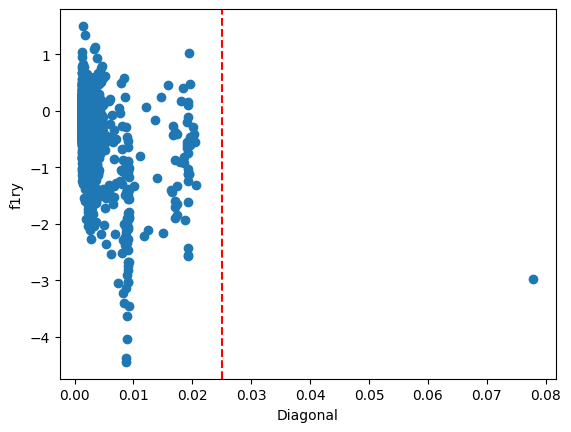

In [41]:
plt.scatter(np.diag(hat_matrix), Y_beta)
plt.axvline(x=0.025, color='red', linestyle='--', label='Línea Vertical')
plt.xlabel('Diagonal')
plt.ylabel('f1ry')
plt.show()

We can see that most of the values of the diagonal of the hat matriz are concentrated between 0.00 and 0.025, beyond that point we can se a high leverage because it has an extreme x value 

### Studentized Residuals.

In [42]:
diagnostics = mkmodel.get_influence().summary_frame()
diagnostics

,dfb_const,dfb_pm,dfb_oepsp,dfb_S,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
91,0.014107,0.001668,-0.000211,-0.007084,5.006004e-05,0.387333,0.001333,0.014151,0.387199,0.014146
186,-0.046037,-0.003859,-0.004170,0.020887,5.466069e-04,-1.276261,0.001341,-0.046759,-1.276589,-0.046771
756,0.010494,0.047470,-0.086434,0.012870,3.692573e-03,1.753119,0.004783,0.121533,1.754607,0.121636
851,0.051130,0.005999,-0.001238,-0.025939,6.557444e-04,1.402152,0.001332,0.051215,1.402706,0.051235
1135,-0.012749,-0.001440,-0.000256,0.006179,4.114482e-05,-0.350984,0.001334,-0.012829,-0.350858,-0.012824
...,...,...,...,...,...,...,...,...,...,...
530234,-0.008787,-0.000980,0.000058,0.004387,1.944824e-05,-0.241581,0.001331,-0.008820,-0.241488,-0.008817
530899,-0.001179,-0.012282,-0.003456,-0.030893,4.644649e-04,-0.879667,0.002395,-0.043103,-0.879586,-0.043099
532324,0.001579,0.000188,-0.000005,-0.000783,6.282804e-07,0.043378,0.001334,0.001585,0.043360,0.001585
532704,-0.000104,0.006038,0.013180,0.027900,2.843578e-04,0.636417,0.002800,0.033726,0.636262,0.033718


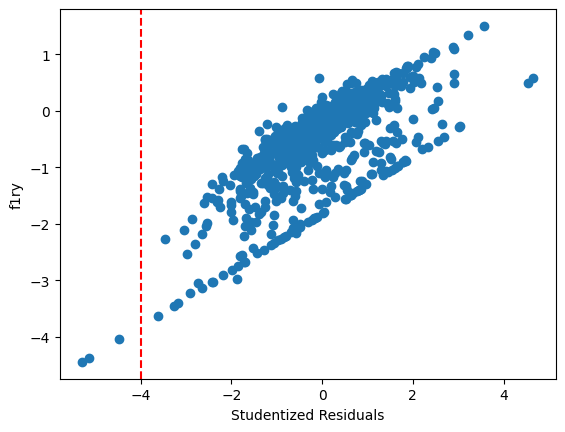

In [43]:
plt.scatter(diagnostics.student_resid, Y_beta)
plt.axvline(x=-4, color='red', linestyle='--', label='Línea Vertical')

plt.xlabel('Studentized Residuals')
plt.ylabel('f1ry')
plt.show()


The only value to appears to be an outlier would be the points that are x = 0 and x = -1 because they don´t seem to follow the trend of the other values, and for high leverage the values that are beyond -4 seems to have it and we are going to run some tests to see if that is true

### Influential points

In [44]:
sr = Y_beta.copy()

In [45]:
sr['sr'] = diagnostics.student_resid

proof1 = sr[sr['sr']>-4].copy()
proof1

,f1ry,sr
91,0.050974,0.387199
186,-0.741153,-1.276589
756,-0.501735,1.754607
851,0.558852,1.402706
1135,-0.305321,-0.350858
...,...,...
530234,-0.263090,-0.241488
530899,-1.150274,-0.879586
532324,-0.116888,0.043360
532704,-0.171440,0.636262


In [46]:
mkmodel_p1 = sm.OLS(proof1['f1ry'], sm.add_constant(proof1['sr']), missing = 'drop').fit()

print(mkmodel_p1.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1187.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          2.53e-182
Time:                        23:39:00   Log-Likelihood:                -837.94
No. Observations:                1225   AIC:                             1680.
Df Residuals:                    1223   BIC:                             1690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3882      0.014    -28.310      0.0

Now let´s test this same model but without taking out the extreme values.

In [47]:
mkmodel_p1 = sm.OLS(sr['f1ry'], sm.add_constant(sr['sr']), missing = 'drop').fit()

print(mkmodel_p1.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1332.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          4.89e-198
Time:                        23:39:00   Log-Likelihood:                -851.83
No. Observations:                1228   AIC:                             1708.
Df Residuals:                    1226   BIC:                             1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3918      0.014    -28.336      0.0

We can see that actually the R-squared is better when we take in account those values so we shouldn´t take them as influential points

### Cook´s distance

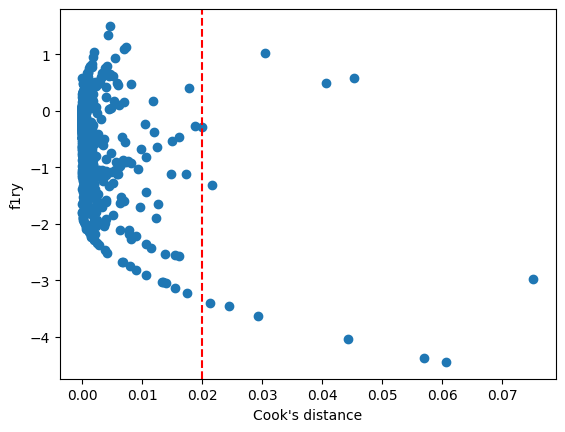

In [57]:
plt.scatter(diagnostics.cooks_d, Y_beta)
plt.axvline(x=0.02, color='red', linestyle='--', label='Línea Vertical')
plt.xlabel("Cook's distance")
plt.ylabel('f1ry')
plt.show()

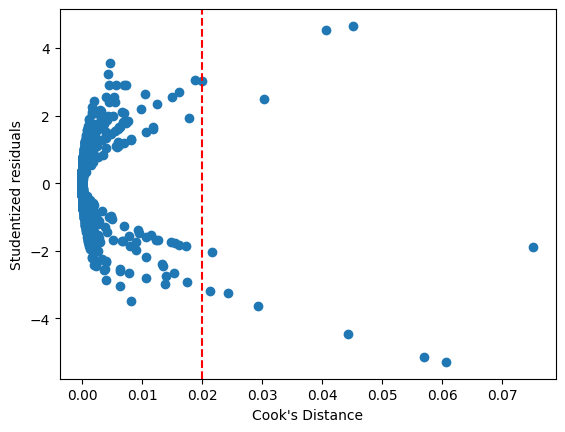

In [56]:
plt.scatter(x = diagnostics.cooks_d, y = diagnostics.student_resid)
plt.axvline(x=0.02, color='red', linestyle='--', label='Línea Vertical')
plt.xlabel("Cook's Distance")
plt.ylabel('Studentized residuals')
plt.show()

In [50]:
sr1 = Y_beta.copy()
sr1['sr'] = diagnostics.student_resid
sr1['cd'] = diagnostics.cooks_d

proof1 = sr1[sr1['cd']<0.025].copy()
proof1

,f1ry,sr,cd
91,0.050974,0.387199,5.006004e-05
186,-0.741153,-1.276589,5.466069e-04
756,-0.501735,1.754607,3.692573e-03
851,0.558852,1.402706,6.557444e-04
1135,-0.305321,-0.350858,4.114482e-05
...,...,...,...
530234,-0.263090,-0.241488,1.944824e-05
530899,-1.150274,-0.879586,4.644649e-04
532324,-0.116888,0.043360,6.282804e-07
532704,-0.171440,0.636262,2.843578e-04


In [51]:
mkmodel_p1 = sm.OLS(proof1['sr'], sm.add_constant(proof1['cd']), missing = 'drop').fit()

print(mkmodel_p1.summary())

                            OLS Regression Results                            
Dep. Variable:                     sr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     9.172
Date:                Fri, 17 Nov 2023   Prob (F-statistic):            0.00251
Time:                        23:39:01   Log-Likelihood:                -1660.8
No. Observations:                1220   AIC:                             3326.
Df Residuals:                    1218   BIC:                             3336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0384      0.029      1.326      0.1

In [52]:
mkmodel_p1 = sm.OLS(sr1['sr'], sm.add_constant(sr1['cd']), missing = 'drop').fit()

print(mkmodel_p1.summary())

                            OLS Regression Results                            
Dep. Variable:                     sr   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     26.24
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.49e-07
Time:                        23:39:01   Log-Likelihood:                -1733.0
No. Observations:                1228   AIC:                             3470.
Df Residuals:                    1226   BIC:                             3480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0402      0.029      1.367      0.1

In this case we can see that the points far beyond the limit are influential points because in the model comparission the one who has a better r-squared is the one in wich we took out those points.

### Taking out influential points

In [53]:
outliers = np.where((diagnostics.cooks_d > 0.1))[0].tolist()
diagnostics = diagnostics.drop(diagnostics.index[outliers])

In [54]:
final = dataser2022[['ato', 'pm', 'epsp', 'bmr','oepsp', 'S', 'M', 'H', 'f1ry']].copy()
final = final.drop(final.index[outliers])
y = final[['f1ry']]
final = final[['pm','oepsp', 'S']]
final = sm.add_constant(final)
final

,const,pm,oepsp,S
91,1.0,0.183119,0.036518,0
186,1.0,-0.009879,0.085764,0
756,1.0,-0.297988,-1.094383,1
851,1.0,0.112936,0.031635,0
1135,1.0,0.253096,0.053777,0
...,...,...,...,...
531754,1.0,NaN,-0.197748,0
532324,1.0,0.261634,0.042707,0
532704,1.0,-0.207481,-0.169924,1
532894,1.0,0.048135,0.028481,0


In [55]:
mkmodel4 = sm.OLS(y, final, missing = 'drop').fit()

print(mkmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     376.2
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          4.21e-173
Time:                        23:39:01   Log-Likelihood:                -902.25
No. Observations:                1228   AIC:                             1812.
Df Residuals:                    1224   BIC:                             1833.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1795      0.019     -9.705      0.0

### Conclusion.

In this last model we got an R-Squared equal to 0.48 wich means our model is 48% accurate, even we try improve it taking out the variables that seems to be not significant to it and trying to take out the indexes of the influential points we didn´t manage to get a better score. Even tought this result could be better and we could make some improvements, we got some good insights on this industry.

In this last model we only use the variables that had p value smaller than 0.05 enough to reject the null hypothesis.

We saw that some variables had a good impact in the different iterations of our models, including the winsorized asset turnover ratio, contributed to the model's explanatory power. Dummy variables for different-sized firms provided insights into the average changes in returns compared to small-sized firms, at the end only the dummy variable of small firms was significant to this analysis.
